<a href="https://colab.research.google.com/github/theAkhileshRai/Projects/blob/master/Dcp_leak_classification(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import xlrd 
import os 
import glob
import re 
from plotly.subplots import make_subplots
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import warnings
warnings.filterwarnings("error")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
!pip install chart_studio
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import plotly.offline as py
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.offline import  download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.io as pio
pio.renderers.default = 'colab'
from itertools import groupby
import plotly.express as px



from glob import glob

from datetime import datetime as dt
import warnings
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from datetime import datetime
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import hstack
from numpy import array
from random import random
from sklearn.preprocessing import MinMaxScaler

pd.options.mode.chained_assignment = None 
!npm install -g electron@1.8.4 orca
!pip install psutil requests

npm WARN deprecated request@2.88.2: request has been deprecated, see https://github.com/request/request/issues/3142
npm WARN deprecated left-pad@1.3.0: use String.prototype.padStart()
/tools/node/bin/electron -> /tools/node/lib/node_modules/electron/cli.js
/tools/node/bin/orca -> /tools/node/lib/node_modules/orca/bin/orca.js

> electron@1.8.4 postinstall /tools/node/lib/node_modules/electron
> node install.js

/tools/node/lib/node_modules/electron/install.js:47
  throw err
  ^

Error: EACCES: permission denied, mkdir '/tools/node/lib/node_modules/electron/.electron'
npm ERR! code ELIFECYCLE
npm ERR! errno 1
npm ERR! electron@1.8.4 postinstall: `node install.js`
npm ERR! Exit status 1
npm ERR! 
npm ERR! Failed at the electron@1.8.4 postinstall script.
npm ERR! This is probably not a problem with npm. There is likely additional logging output above.

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2020-06-09T12_00_54_737Z-debug.log


In [0]:
"""import glob
path = "/content/*.xlsx"
leak_data=pd.DataFrame()
for fname in glob.glob(path):
  print (fname)
  data=pd.read_excel(fname)
  data.columns=data.iloc[0]
  data.drop(labels=[0],axis=0,inplace=True)
  data["Station"]=data["Station"]+ " " +data["machine"]
  data["Station"].fillna(method="ffill",inplace=True)
  #data["Cylinder"].fillna(method="ffill",inplace=True)
  leak_data=leak_data.append([leak_data,data],ignore_index=True)
  print (data)"""
 
    

'import glob\npath = "/content/*.xlsx"\nleak_data=pd.DataFrame()\nfor fname in glob.glob(path):\n  print (fname)\n  data=pd.read_excel(fname)\n  data.columns=data.iloc[0]\n  data.drop(labels=[0],axis=0,inplace=True)\n  data["Station"]=data["Station"]+ " " +data["machine"]\n  data["Station"].fillna(method="ffill",inplace=True)\n  #data["Cylinder"].fillna(method="ffill",inplace=True)\n  leak_data=leak_data.append([leak_data,data],ignore_index=True)\n  print (data)'

In [0]:
"""asset_id=list(data["Station"].unique())
asset_id=[i.strip() for i in asset_id]
asset_id"""

'asset_id=list(data["Station"].unique())\nasset_id=[i.strip() for i in asset_id]\nasset_id'

In [0]:
"""for i in data.groupby(by=["Station"]):
  print (i[0])
  start_date,end_date=[],[]
  
  for s in (i)[1]["start date"]:
    start_date.append(str(s))
  for e in (i)[1]["end date"]:
    end_date.append(str(e))
  for e in (i)[1]["Cylinder"]:
    end_date.append(str(e))
  break
start_date,end_date"""

In [0]:
"""import glob
path = "/root/*.csv"
leak_data=pd.DataFrame()
for fname in glob.glob(path):
  file=fname[6:].split(" ")[0]
  file=file.replace("_", " ")
  #print (file.replace("_", " "))
  file=re.sub(r"([0-9]+(\.[0-9]+)?)",r" \1 ", file).strip()
  #data=pd.read_csv(fname,low_memory=False)
  #data.dropna(inplace=True)
  #data_filtering(data,fname)
  #print (file)
  #regex = re.compile('unit\s([0-9]*)')
  #print (regex.findall(file))
  
  for i in asset_id:
    i=i.replace("-", " ")
    if file.split(" ")[0]==i.split(" ")[0] and file.split(" ")[-1]==i.split(" ")[-1]:
      dataframe=pd.read_csv(fname)
      #print (dataframe[dataframe["cyl"]==3])
      test=pd.DataFrame()
      #print (dataframe.shape)
      data=data[data["Station"]==i]
      cyl_ls=list(data["Cylinder"].unique())
     # print (cyl_ls)
      for g in data.groupby(by=["Station"]):
        start_date,end_date,cyl=[],[],[]
        for s in (g)[1]["start date"]:
          start_date.append(str(s))
        for e in (g)[1]["end date"]:
          end_date.append(str(e))
        for c in (g)[1]["Cylinder"]:
          cyl.append(str(c))
      print (start_date,end_date,cyl,file)
      #print (dataframe[dataframe["cyl"]==3])
      for r in cyl_ls:
        fil_data=dataframe[dataframe["cyl"]==3]
        test=pd.concat([test,fil_data],ignore_index=True)
      print (test.columns)

      for r in range(len(start_date)):
        print (test)
        test["Anomaly"]=np.where((test["time"] > start_date[r])& (test["time"] < end_date[r]),1,0)
     

      leak_data=leak_data.append([leak_data,test],ignore_index=True)
      print (leak_data.shape)  """

'import glob\npath = "/root/*.csv"\nleak_data=pd.DataFrame()\nfor fname in glob.glob(path):\n  file=fname[6:].split(" ")[0]\n  file=file.replace("_", " ")\n  #print (file.replace("_", " "))\n  file=re.sub(r"([0-9]+(\\.[0-9]+)?)",r" \x01 ", file).strip()\n  #data=pd.read_csv(fname,low_memory=False)\n  #data.dropna(inplace=True)\n  #data_filtering(data,fname)\n  #print (file)\n  #regex = re.compile(\'unit\\s([0-9]*)\')\n  #print (regex.findall(file))\n  \n  for i in asset_id:\n    i=i.replace("-", " ")\n    if file.split(" ")[0]==i.split(" ")[0] and file.split(" ")[-1]==i.split(" ")[-1]:\n      dataframe=pd.read_csv(fname)\n      #print (dataframe[dataframe["cyl"]==3])\n      test=pd.DataFrame()\n      #print (dataframe.shape)\n      data=data[data["Station"]==i]\n      cyl_ls=list(data["Cylinder"].unique())\n     # print (cyl_ls)\n      for g in data.groupby(by=["Station"]):\n        start_date,end_date,cyl=[],[],[]\n        for s in (g)[1]["start date"]:\n          start_date.append(st

In [0]:
"""import glob
path = "/root/*.csv"
final_data=pd.DataFrame()
for fname in glob.glob(path):
  print (fname)
  data=pd.read_csv(fname)
  print (data.shape)
  final_data=pd.concat([final_data,data],ignore_index=True)
final_data.shape"""

'import glob\npath = "/root/*.csv"\nfinal_data=pd.DataFrame()\nfor fname in glob.glob(path):\n  print (fname)\n  data=pd.read_csv(fname)\n  print (data.shape)\n  final_data=pd.concat([final_data,data],ignore_index=True)\nfinal_data.shape'

In [0]:
"""data=pd.read_csv("/root/test_2.csv")
data.shape"""

(77321, 17)

In [0]:
"""#data=pd.DataFrame()
dataframe=pd.read_csv("/root/Lightning_Unit4 (2) (1).csv")
dataframe["Asset"]="Lightning_Unit4"
dataframe=dataframe[dataframe["cyl"]==2]

print (dataframe.shape)
dataframe_1=pd.read_csv("/root/Goliad_Unit1100 (1) (1).csv")
dataframe_1=dataframe_1[dataframe_1["cyl"]==2]
dataframe_1["Asset"]="Goliad_Unit1100"
print (dataframe_1.shape)

dataframe.loc[ (dataframe["time"] > "2019-05-22 0:00:00") & (dataframe["time"] < "2019-05-29 0:00:00"), "multi_class"]="pre_1"
dataframe.loc[ (dataframe["time"] > "2019-05-29 0:00:00") & (dataframe["time"] < "2019-06-21 0:00:00"), "multi_class"]="level_1"
dataframe.loc[ (dataframe["time"] > "2019-06-21 0:00:00") & (dataframe["time"] < "2019-06-23 0:00:00"), "multi_class"]="level_2" 
dataframe.loc[ (dataframe["time"] > "2019-06-23 0:00:00") & (dataframe["time"] < "2019-06-24 0:00:00"), "multi_class"]="level_3"
#dataframe["Binary"]=np.where((dataframe["time"] > "2019-03-25 0:00:00")& (dataframe["time"] < "2019-03-29 0:00:00"),1,0)
dataframe.loc[ (dataframe["time"] > "2019-05-22 0:00:00")& (dataframe["time"] < "2019-06-24 0:00:00"),"Binary"]=int(1)


dataframe.loc[ (dataframe["time"] > "2019-04-25 0:00:00") & (dataframe["time"] < "2019-05-02 0:00:00"), "multi_class"]="pre_1"
dataframe.loc[ (dataframe["time"] > "2019-05-02 0:00:00") & (dataframe["time"] < "2019-05-31 0:00:00"), "multi_class"]="level_1"
dataframe.loc[ (dataframe["time"] > "2019-05-31 0:00:00") & (dataframe["time"] < "2019-06-12 0:00:00"), "multi_class"]="level_2" 
#dataframe.loc[ (dataframe["time"] > "2019-03-28 0:00:00") & (dataframe["time"] < "2019-03-29 0:00:00"), "multi_class"]="level_3"
#dataframe["Binary"]=np.where((dataframe["time"] > "2019-03-25 0:00:00")& (dataframe["time"] < "2019-03-29 0:00:00"),1,0
dataframe.loc[ (dataframe["time"] > "2019-04-25 0:00:00")& (dataframe["time"] < "2019-06-12 0:00:00"),"Binary"]=int(1)                            


#dataframe.loc[ (dataframe["time"] > "2019-09-06 0:00:00") & (dataframe["time"] < "2019-10-29 0:00:00"), "multi_class"]="pre_1"
dataframe.loc[ (dataframe["time"] > "2019-09-06 0:00:00") & (dataframe["time"] < "2019-10-29 0:00:00"), "multi_class"]="level_1"
dataframe.loc[ (dataframe["time"] > "2019-10-29 0:00:00") & (dataframe["time"] < "2019-12-06 0:00:00"), "multi_class"]="level_2" 
dataframe.loc[ (dataframe["time"] > "2019-12-06 0:00:00") & (dataframe["time"] < "2019-12-27 0:00:00"), "multi_class"]="level_3"
#dataframe["Binary"]=np.where((dataframe["time"] > "2019-03-25 0:00:00")& (dataframe["time"] < "2019-03-29 0:00:00"),1,0
dataframe.loc[ (dataframe["time"] > "2019-09-06 0:00:00")& (dataframe["time"] < "2019-12-27 0:00:00"),"Binary"]=int(1)                            

dataframe.loc[ (dataframe["time"] > "2019-06-25 0:00:00") & (dataframe["time"] < "2019-08-17 0:00:00"), "multi_class"]="pre_1"
dataframe.loc[ (dataframe["time"] > "2019-08-17 0:00:00") & (dataframe["time"] < "2019-09-17 0:00:00"), "multi_class"]="level_1"
dataframe.loc[ (dataframe["time"] > "2019-09-17 0:00:00") & (dataframe["time"] < "2019-09-20 0:00:00"), "multi_class"]="level_2" 
dataframe.loc[ (dataframe["time"] > "2019-09-20 0:00:00") & (dataframe["time"] < "2019-12-02 0:00:00"), "multi_class"]="level_3"
#dataframe["Binary"]=np.where((dataframe["time"] > "2019-03-25 0:00:00")& (dataframe["time"] < "2019-03-29 0:00:00"),1,0
dataframe.loc[ (dataframe["time"] > "2019-06-25 0:00:00")& (dataframe["time"] < "2019-12-02 0:00:00"),"Binary"]=int(1)                            


#dataframe.loc[ (dataframe["time"] > "2019-06-25 0:00:00") & (dataframe["time"] < "2019-08-17 0:00:00"), "multi_class"]="pre_1"
dataframe.loc[ (dataframe["time"] > "2019-12-07 0:00:00") & (dataframe["time"] < "2019-12-18 0:00:00"), "multi_class"]="level_1"
#dataframe.loc[ (dataframe["time"] > "2019-09-17 0:00:00") & (dataframe["time"] < "2019-09-20 0:00:00"), "multi_class"]="level_2" 
#dataframe.loc[ (dataframe["time"] > "2019-09-20 0:00:00") & (dataframe["time"] < "2019-12-02 0:00:00"), "multi_class"]="level_3"
#dataframe["Binary"]=np.where((dataframe["time"] > "2019-03-25 0:00:00")& (dataframe["time"] < "2019-03-29 0:00:00"),1,0
dataframe.loc[ (dataframe["time"] > "2019-12-07 0:00:00")& (dataframe["time"] < "2019-12-18 0:00:00"),"Binary"]=int(1)                            

dataframe["multi_class"].fillna("Normal",inplace=True)
dataframe["Binary"].fillna(int(0),inplace=True)

dataframe_1.loc[ (dataframe_1["time"] > "2019-08-12 0:00:00")& (dataframe_1["time"] < "2019-08-23 0:00:00"),"multi_class"]="pre_1"
dataframe_1.loc[ (dataframe_1["time"] > "2019-08-23 0:00:00")& (dataframe_1["time"] < "2019-08-24 0:00:00"),"multi_class"]="level_1"
dataframe_1.loc[ (dataframe_1["time"] > "2019-08-24 0:00:00")& (dataframe_1["time"] < "2019-08-27 0:00:00"),"multi_class"]="level_2"
#dataframe_1.loc[ (dataframe_1["time"] > "2018-08-27 0:00:00")& (dataframe_1["time"] < "2019-06-02 0:00:00"),"multi_class"]="level_3"#
dataframe_1["multi_class"].fillna("Normal",inplace=True)
dataframe_1["Binary"]=np.where((dataframe_1["time"] > "2019-08-12 0:00:00")& (dataframe_1["time"] < "2019-08-27 0:00:00"),1,0)
#dataframe_1.loc[ (dataframe_1["time"] > "2020-03-27 0:00:00")& (dataframe_1["time"] < "2020-04-08 0:00:00"),"Binary"]=int(1)"""


(1860, 14)
(8426, 14)


In [0]:
"""data=data.append([dataframe],ignore_index=True)
print (data.shape)"""

(104459, 17)


In [0]:
data=pd.read_csv("/root/Train_data(1).csv")
print (data.shape)
print (data.head())

(104459, 18)
   Unnamed: 0  Unnamed: 0.1  ...  multi_class Binary
0           0             0  ...       Normal    0.0
1           1             1  ...       Normal    0.0
2           2             2  ...       Normal    0.0
3           3             3  ...       Normal    0.0
4           4             4  ...       Normal    0.0

[5 rows x 18 columns]


In [0]:
data["multi_class"].value_counts()

Normal     68193
level_1    19264
level_3     8614
pre_1       5842
level_2     2546
Name: multi_class, dtype: int64

In [0]:
#data["Anomaly"]=data["Anomaly"].astype("int32")
data["Binary"].value_counts()

0.0    68193
1.0    36266
Name: Binary, dtype: int64

In [0]:
data["Asset"].unique()

array(['Ashland_Unit256', 'Center station_C2', 'El Dorado_Unit J2502',
       'Saltlake_K71010B', 'West_Turkey_Unit2', 'Cross bar_Unit1',
       'Reagan_1_Unit6', 'Reagan_1_Unit3', 'Lightning_Unit2',
       'Hobit_Unit2', 'Katy_Unit1116', 'Katy_Unit1117', 'HobitLP_Unit102',
       'Goliad_Unit1100', 'Lightning_Unit4'], dtype=object)

In [0]:
data.isnull().any()

Unnamed: 0          False
Unnamed: 0.1        False
Unnamed: 0.1.1       True
time                False
cyl                 False
s_temp_crank        False
d_temp_crank        False
s_pressure_crank    False
d_pressure_crank    False
rpm_crank           False
s_temp_mean         False
d_temp_mean         False
s_pressure_mean     False
d_pressure_mean     False
rpm_mean            False
Asset               False
multi_class         False
Binary              False
dtype: bool

In [0]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,time,cyl,s_temp_crank,d_temp_crank,s_pressure_crank,d_pressure_crank,rpm_crank,s_temp_mean,d_temp_mean,s_pressure_mean,d_pressure_mean,rpm_mean,Asset,multi_class,Binary
77321,77321,25246,NaN,2019-01-01 00:30:00,4.0,53.614049,123.741902,517.159668,951.799443,849.924375,53.614049,124.624562,510.341353,946.301707,849.924375,Goliad_Unit1100,Normal,0.0
77322,77322,25247,NaN,2019-01-01 01:30:00,4.0,51.874849,121.666289,517.294306,950.450814,846.270375,51.874849,122.186573,510.930396,942.966040,846.270375,Goliad_Unit1100,Normal,0.0
77323,77323,25248,NaN,2019-01-01 02:30:00,4.0,53.591805,123.718048,516.760240,951.074639,849.385375,53.591805,124.338788,510.204471,944.000512,849.385375,Goliad_Unit1100,Normal,0.0
77324,77324,25249,NaN,2019-01-01 03:30:00,4.0,53.114352,123.348868,515.095212,949.205409,851.701000,53.114352,124.152829,509.024141,944.436965,851.701000,Goliad_Unit1100,Normal,0.0
77325,77325,25250,NaN,2019-01-01 07:30:00,4.0,60.109787,132.071436,524.973185,976.743455,804.600000,60.109787,132.953678,519.534914,973.809460,804.600000,Goliad_Unit1100,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104454,104454,4913,NaN,2019-12-31 19:30:00,2.0,57.404187,192.870092,45.099492,173.448757,1097.043750,57.404187,194.540939,45.360622,176.846614,1095.845625,Lightning_Unit4,Normal,0.0
104455,104455,4914,NaN,2019-12-31 20:30:00,2.0,58.232545,192.783737,44.219374,169.162607,1094.240000,58.232545,195.095137,44.179864,172.503697,1094.654375,Lightning_Unit4,Normal,0.0
104456,104456,4915,NaN,2019-12-31 21:30:00,2.0,58.345895,193.720827,43.146701,166.990013,1096.650000,58.345895,195.398975,43.390119,170.251174,1096.146250,Lightning_Unit4,Normal,0.0
104457,104457,4916,NaN,2019-12-31 22:30:00,2.0,57.941348,194.445306,42.829713,167.715724,1095.042500,57.941348,196.355408,42.965954,170.994143,1093.078125,Lightning_Unit4,Normal,0.0


In [0]:
print (data.shape)
data.drop_duplicates(inplace=True)
print (data.shape)

(104459, 18)
(104459, 18)


In [0]:
data["side_difference_temp"]=data["s_temp_mean"]-data["d_temp_mean"]
data["side_difference_pressure"]=data["s_pressure_mean"]-data["d_pressure_mean"]
data["suction_difference"]=data["s_temp_mean"]-data["s_pressure_mean"]
data["discharge_difference"]=data["d_temp_mean"]-data["d_pressure_mean"]                                                                            

In [0]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'time', 'cyl',
       's_temp_crank', 'd_temp_crank', 's_pressure_crank', 'd_pressure_crank',
       'rpm_crank', 's_temp_mean', 'd_temp_mean', 's_pressure_mean',
       'd_pressure_mean', 'rpm_mean', 'Asset', 'multi_class', 'Binary',
       'side_difference_temp', 'side_difference_pressure',
       'suction_difference', 'discharge_difference'],
      dtype='object')

In [0]:
data.drop(labels=['Unnamed: 0.1.1','Unnamed: 0', 'Unnamed: 0.1','cyl', 's_temp_crank','time',
       'd_temp_crank', 's_pressure_crank', 'd_pressure_crank', 'rpm_crank','rpm_mean', 'Asset', 'multi_class'],axis=1,inplace=True)
data.shape

(104459, 9)

In [0]:
data.columns

Index(['s_temp_mean', 'd_temp_mean', 's_pressure_mean', 'd_pressure_mean',
       'Binary', 'side_difference_temp', 'side_difference_pressure',
       'suction_difference', 'discharge_difference'],
      dtype='object')

In [0]:
x=data.copy()
x.drop(labels=["Binary"],axis=1,inplace=True)
y=data["Binary"]


#lets do train_test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
print (x_train.shape)
print (x_train.columns)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)


(83567, 8)
Index(['s_temp_mean', 'd_temp_mean', 's_pressure_mean', 'd_pressure_mean',
       'side_difference_temp', 'side_difference_pressure',
       'suction_difference', 'discharge_difference'],
      dtype='object')
(83567,)
(20892, 8)
(20892,)


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)
print (x_train.shape)
print (x_test.shape)

(83567, 8)
(20892, 8)


In [0]:

def perform_model(X_train,y_train,X_test,y_test,model):
    results=dict()
    
    #time at which model starts a training phase
    start_time=datetime.now()
    model.fit(X_train,y_train)
    end_time=datetime.now()
    training_time=end_time-start_time
    
    print('\n\n')
    print ("model has been trained and it has taken {} time".format(training_time))
    
    print ("results for trained model are below:")
    
    y_pred=model.predict(X_test)
    
    
    #Grid search result:\
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    
    accuracy=accuracy_score(y_test, y_pred)
    print('---------------------')                                          
    print('Accuracy : {}'.format(accuracy))
    print('---------------------')
    print('\n\n')
          
    
    cm=confusion_matrix(y_test,y_pred)
    print('---------------------')
    print ("Confusion Matrix : \n {}".format(cm))
    print('---------------------')
    print('\n\n')
    
    
    cr = classification_report(y_test, y_pred)
    print('---------------------')
    print ("classification_report :")
    print('\n')
    print (cr)
    print('---------------------')
   
    
    results["accuracy"]=accuracy
    #results["fi"]=model.best_estimator_.feature_importances_ 
    
    return results,model
    

In [0]:
param_grid = {'learning_rate': [0.01,0.001,0.0001,0.1], 'max_depth':[5,10,15], 'n_estimators': [100,200,300]}
gbdt =xgb.XGBClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results,model = perform_model( x_train, y_train, x_test, y_test, model=gbdt_grid)




model has been trained and it has taken 1:32:28.095214 time
results for trained model are below:
--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}

---------------------
Accuracy : 0.8883783266322037
---------------------



---------------------
Confusion Matrix : 
 [[12984   694]
 [ 1638  5576]]
---------------------



---------------------
classification_report :


              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     13678
         1.0       0.89      0.77      0.83      7214

    accuracy                           0.89     20892
   macro avg       0.89      0.86      0.87     20892
weighted avg       0.89      0.89      0.89     20892

---------------------


In [0]:
import pickle
with open(r"/root/Grad_boost.pickle", "wb") as output_file:
  pickle.dump(model, output_file)
with open(r"/root/Grad_boost.pickle", "rb") as input_file:
  e = pickle.load(input_file)


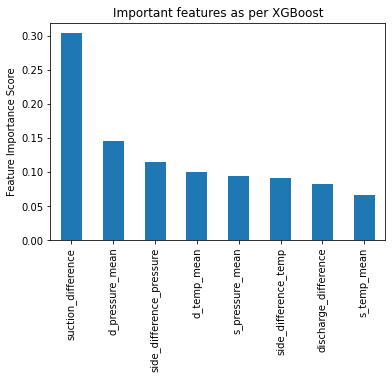

In [0]:
index=['s_temp_mean', 'd_temp_mean', 's_pressure_mean', 'd_pressure_mean',
       'side_difference_temp', 'side_difference_pressure',
       'suction_difference', 'discharge_difference']

imp_feat_xgb=pd.Series(model.best_estimator_.feature_importances_, index=index).sort_values(ascending=False)
imp_feat_xgb.plot(kind='bar',title='Important features as per XGBoost', figsize=(6,4))
plt.ylabel('Feature Importance Score')
plt.show()

In [0]:

param={"max_depth": [1,5,10,15,20],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
Rf=RandomForestClassifier(class_weight="balanced")
Rf_grid = GridSearchCV(Rf, param_grid=param, n_jobs=-1)
Rf_grid_results,model = perform_model( x_train, y_train, x_test, y_test, model=Rf_grid)

In [0]:
parameters = {'max_depth':np.arange(3,20,2)}
dt = DecisionTreeClassifier(class_weight="balanced")
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results,model_2= perform_model(x_train, y_train, x_test, y_test, model=dt_grid)




model has been trained and it has taken 0:00:27.834167 time
results for trained model are below:
--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 15}

---------------------
Accuracy : 0.8527666092284127
---------------------



---------------------
Confusion Matrix : 
 [[12071  1834]
 [ 1242  5745]]
---------------------



---------------------
classification_report :


              precision    recall  f1-score   support

           0       0.91      0.87      0.89     13905
           1       0.76      0.82      0.79      6987

    accuracy                           0.85     20892
   macro avg       0.83      0.85      0.84     20892
weighted avg       0.86      0.85      0.85     20892

---------------------


In [0]:
model_2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#LogisticRegression
parameters = {'C':[0.001,0.0001,0.01, 0.1, 1, 2], 'penalty':['l2',"l1"]}
log_reg =LogisticRegression(class_weight="balanced")
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results,model_3=  perform_model(x_train, y_train, x_test, y_test,model=log_reg_grid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    2.9s finished





model has been trained and it has taken 0:00:03.300482 time
results for trained model are below:
--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.01, 'penalty': 'l2'}

---------------------
Accuracy : 0.6051598698066245
---------------------



---------------------
Confusion Matrix : 
 [[9805 4100]
 [4149 2838]]
---------------------



---------------------
classification_report :


              precision    recall  f1-score   support

           0       0.70      0.71      0.70     13905
           1       0.41      0.41      0.41      6987

    accuracy                           0.61     20892
   macro avg       0.56      0.56      0.56     20892
weighted avg       0.60      0.61      0.60     20892

---------------------


In [0]:
model_3.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)